# HW1 for Statistics with Meteorological Application

## Import pacakges and open file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm

# Load the data
file_path = 'TS Statistics Meteor.txt'
data = pd.read_csv(file_path, header=None, names=['Value'])
data['Time'] = pd.date_range(start='2020-01-01', periods=len(data), freq='M')
data.set_index('Time', inplace=True)

## Plot the deseasonalized data

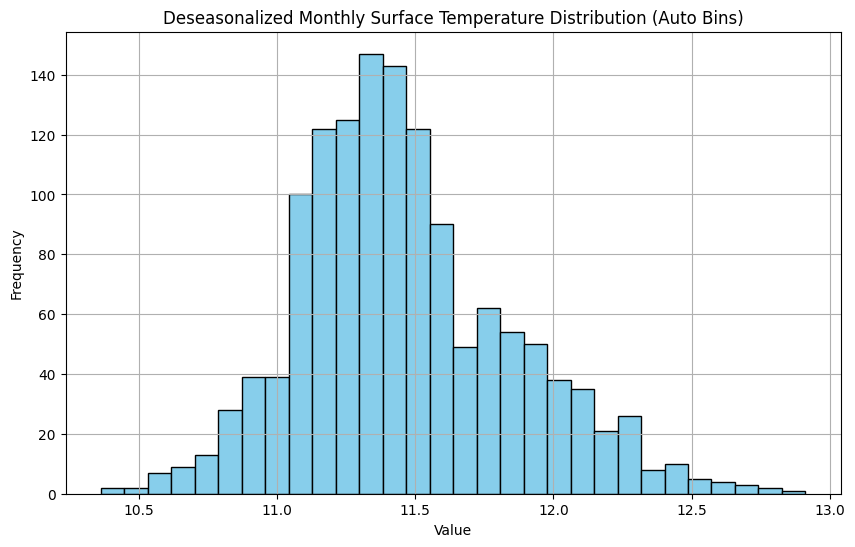

In [2]:
# Decomposition with a monthly period for surface temperature data
decomposition_result_monthly = seasonal_decompose(data['Value'], model='additive', period=12)
data['Deseasonalized_Monthly'] = data['Value'] - decomposition_result_monthly.seasonal

# Plotting the deseasonalized data histogram with the original bin size
plt.figure(figsize=(10, 6))
plt.hist(data['Deseasonalized_Monthly'], bins='auto', color='skyblue', edgecolor='black')
plt.title('Deseasonalized Monthly Surface Temperature Distribution (Auto Bins)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Adding fitting curve and deduct the mean value

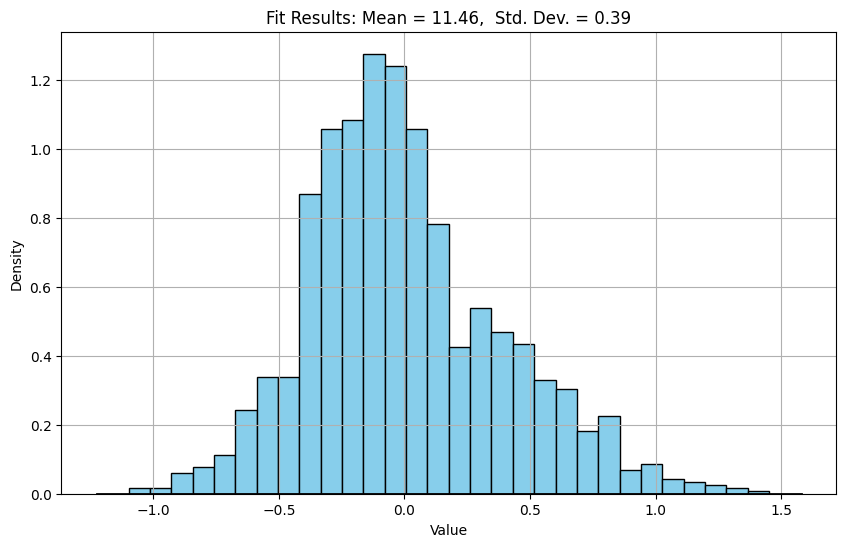

In [3]:
# Calculating the mean and standard deviation of the deseasonalized data for the normal distribution fit
mu, std = norm.fit(data['Deseasonalized_Monthly'])

# Plotting the histogram of the deseasonalized data again
plt.figure(figsize=(10, 6))
data['Deseasonalized_Monthly'] -= data['Deseasonalized_Monthly'].mean()
n, bins, patches = plt.hist(data['Deseasonalized_Monthly'], bins='auto', color='skyblue', edgecolor='black', density=True)

# Adding a fitting curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Results: Mean = %.2f,  Std. Dev. = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## Plot oringinal data with different bin-size

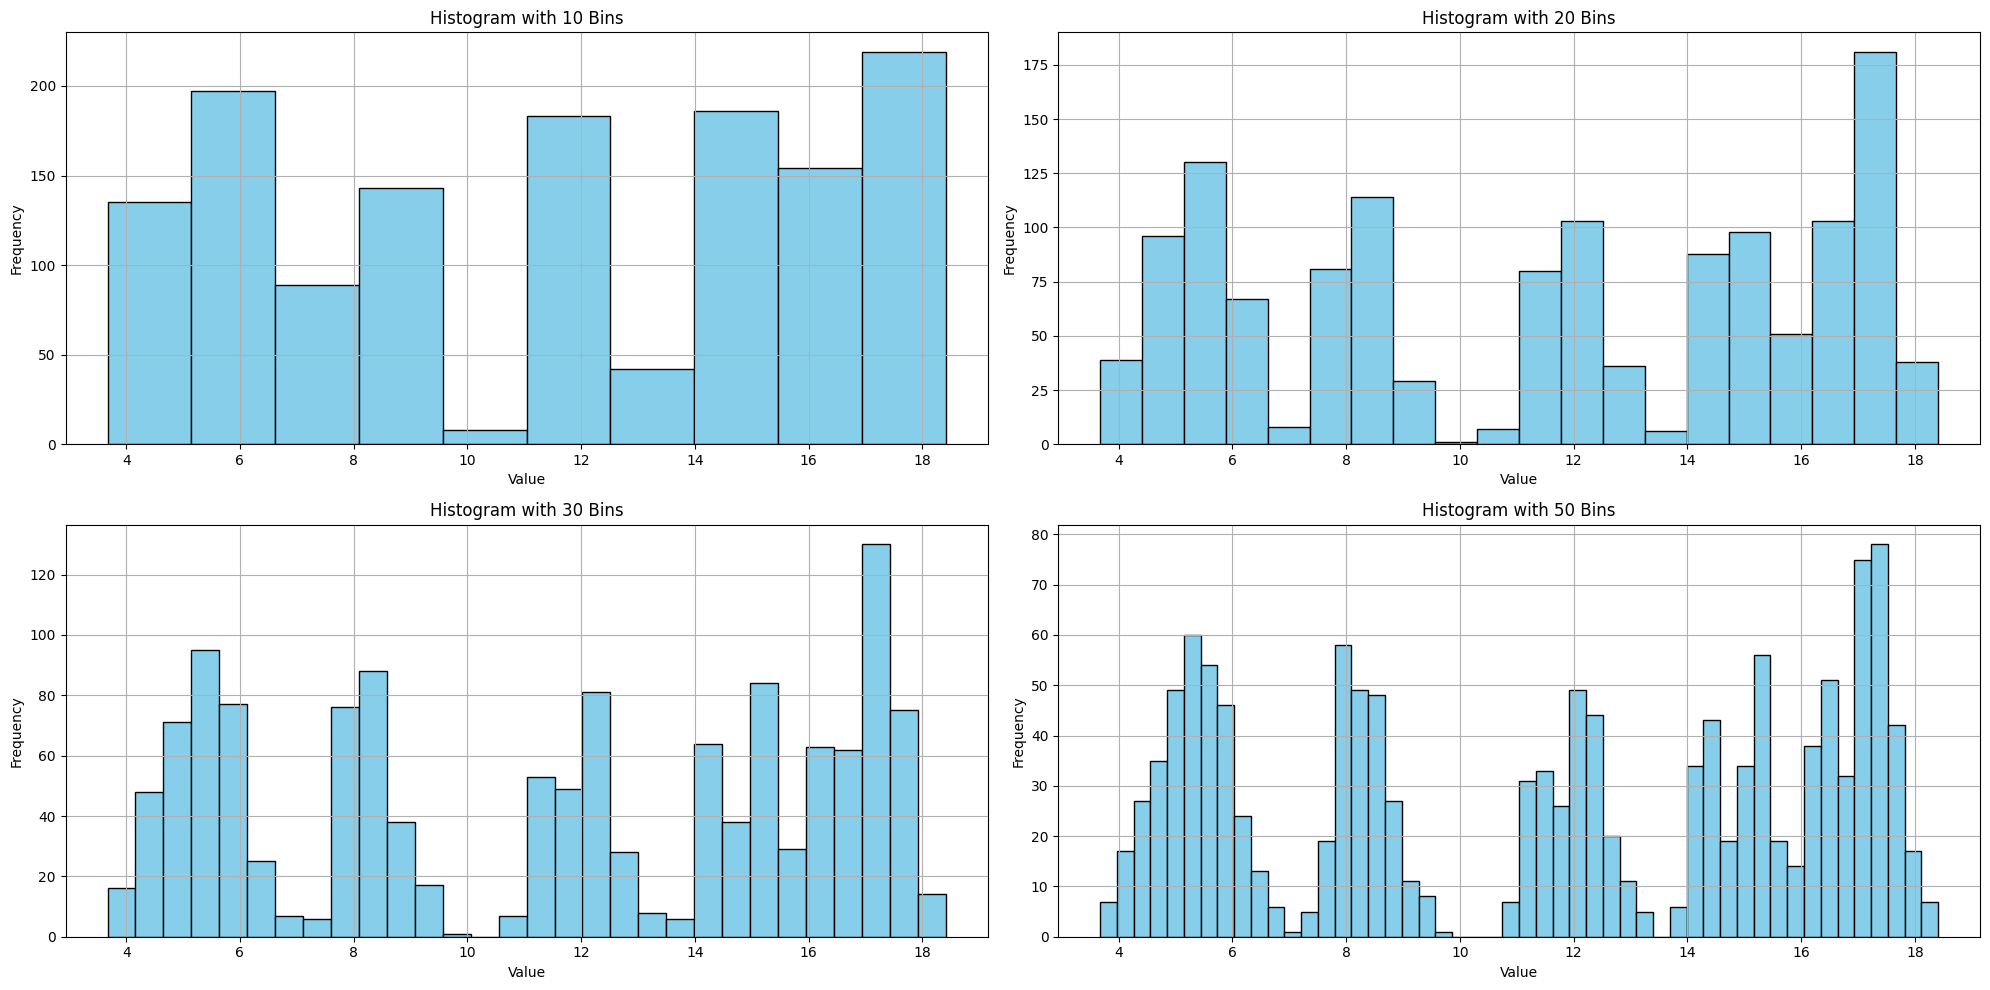

In [4]:
# Plotting histograms with different bin sizes for the original data
bin_sizes = [10, 20, 30, 50]

plt.figure(figsize=(20, 10))
for i, bins in enumerate(bin_sizes, 1):
    plt.subplot(2, 2, i)
    plt.hist(data['Value'], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with {bins} Bins')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
plt.tight_layout()
plt.show()

## Discussion

The results from the histogram analysis of the monthly surface temperature data, both before and after removing the seasonal cycle, reveal several key insights into the temperature distribution and its variability. Here's a detailed explanation of the findings:

### Deseasonalized Data Histogram

- **Uniformity and Shift**: The deseasonalized histogram shows a distribution of temperatures with the seasonal influence removed. This process aims to highlight the underlying temperature trends without the regular ups and downs caused by seasonal changes. The pattern in this histogram is more uniform, indicating that once we account for the seasonal cycle, the remaining variability in temperature is less extreme. This could suggest that a significant portion of the temperature variation is due to seasonality.
- **Distribution Shape**: The shape of the deseasonalized distribution may still show some variability, but without the clear peaks and troughs associated with specific seasons. This smoother distribution helps in identifying other factors that might influence temperature variations over time, such as long-term climate change or other non-seasonal effects.

### Original Data Histograms with Different Bin Sizes

- **Variability with Seasonality**: The histograms of the original data with varying bin sizes showcase how temperature distributions are influenced by seasons. With fewer bins, the distribution appears more generalized, potentially obscuring some of the finer details but highlighting the broader temperature ranges. As the number of bins increases, the seasonal effects become more pronounced, with clearer distinctions between the warmer and cooler periods of the year.
- **Seasonal Patterns**: The appearance of multiple peaks in histograms with more bins reflects the cyclical nature of temperature changes over the months. These peaks correspond to the seasonal transitions, with higher temperatures typically observed in the summer months and lower temperatures in the winter months for temperate regions. The distribution's shape can reveal how temperatures cluster around certain times of the year, indicating the strength and duration of different seasons.

### Why the Pattern Looks Like This

- **Seasonal Influence**: The clear patterns observed in the histograms are primarily due to the Earth's axial tilt and orbit around the Sun, leading to varying amounts of solar radiation received during different times of the year. This results in the characteristic seasonal temperature variations.
- **Geographic Factors**: Local geographical features, such as proximity to oceans, elevation, and prevailing wind patterns, can also influence the temperature distribution, adding layers of complexity to the seasonal patterns. 
> ! Warming  
> This item seems to have some problems
- **Climate Variability**: Beyond the immediate seasonal effects, longer-term climate variability and trends can influence the distribution of temperatures. For instance, a warming trend could shift the temperature distribution upwards, making warmer temperatures more common and altering the distribution's shape in the deseasonalized data.
> !  
> The time-related part cannot be identified in the histograms

The analysis of deseasonalized data is crucial for understanding these long-term trends and assessing changes in climate variability without the 'noise' of regular seasonal changes. By comparing the seasonal and deseasonalized distributions, we can better understand the inherent variability in temperature data and the potential impacts of climate change.